# FLOATING-POINT OPERATIONS

The present notebook shows the flops count for different computational strategies presented in the main manuscript.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
import flops

### Equations defining the total number of flops

Below we present the equations defined in the main manuscript for specifying the total-number of flops associated with the overdetermined Cholesky factorization ($\mathtt{Cholesky}$), Conjugate Gradient Least Squares ($\mathtt{CGLS}$), Leão and Silva (1989) ($\mathtt{LS89}$), Soler and Uieda (2021) ($\mathtt{SU21}$), Cordell (1992) ($\mathtt{C92}$), reparameterization ($\mathtt{reparam.}$), Siqueira, Oliveira Jr. and Barbosa (2017) ($\mathtt{SOB17}$), Takahashi, Oliveira Jr. and Barbosa (2020) ($\mathtt{TOB20}$) and Directi Deconvolution ($\mathtt{deconv.}$).

<a id='eq27'></a>

$f_{\mathtt{Cholesky}} = \tfrac{1}{3}D^{3} + 2 D^{2} + 2 \left( P^{2} + P \right) D$ $\tag{27}$

<a id='eq28'></a>

$f_{\mathtt{CGLS}} = 2P(D+1) + \mathtt{ITMAX} \left[ 2P \left( 2D + 3 \right) + 4D \right]$ $\tag{28}$

<a id='eq35'></a>

$f_{\mathtt{LS89}} = \tfrac{7}{6}(D')^{3} + 4P'(D')^{2} + M \, 2 P'$ $\tag{35}$

<a id='eq37'></a>

$f_{\mathtt{SU21}} = M \, 
	\left[ \tfrac{1}{3}(P')^3 + 2(D'+1)(P')^{2} + (4D'+1)P' \right]$ $\tag{37}$

<a id='eq38'></a>

$f_{\mathtt{C92}} = D \log(D) + \mathtt{ITMAX} \left[2D + D \log_{2}(D) \right]$ $\tag{38}$

<a id='eq43'></a>

$f_{\mathtt{reparam.}} = 2Q(DP+D+1) + 2PQ + \mathtt{ITMAX} \left[2Q \left( 2D + 3 \right) + 4D \right]$ $\tag{43}$

<a id='eq50'></a>

$f_{\mathtt{SOB17}} = 2D + \mathtt{ITMAX} \left( 2D^{2} + 3D \right)$ $\tag{50}$

<a id='eq67'></a>

$f_{\mathtt{TOB20}} = \lambda \, (16D)\log_{2}(4D) + 26D + \mathtt{ITMAX} \left[\lambda \, (16D)\log_{2}(4D) + 58D\right]$ $\tag{67}$

<a id='eq70'></a>

$f_{\mathtt{deconv.}} = \lambda \, (12D)\log_{2}(4D) + 72D$ $\tag{70}$

### Simulated curves

In [3]:
# total number of potantil-field data
D_list = [i for i in range(10000,1010000,10000)]

In [4]:
# lists for storing the number of flops curves
Cholesky = []
CGLS = []
LS89 = []
SU21 = []
C92 = []
reparam = []
SOB17 = []
TOB20 = []
deconv = []

In [5]:
for D in D_list:
    Cholesky.append(flops.f_Cholesky(D=D, P=D))
    CGLS.append(flops.f_CGLS(D=D, P=D, ITMAX=50))
    LS89.append(flops.f_LS89(M=D, Dw=49, Pw=225))
    aux = int(np.floor(2*np.sqrt(D)/30 - 1))**2
    SU21.append(flops.f_SU21(M=aux, Dw=900, Pw=900))
    C92.append(flops.f_C92(D=D, ITMAX=6*D))
    reparam.append(flops.f_reparam(D=D, P=D, Q=int(np.floor(0.1*D)), ITMAX=50))
    SOB17.append(flops.f_SOB17(D=D, ITMAX=50))
    TOB20.append(flops.f_TOB20(D=D, ITMAX=50))
    deconv.append(flops.f_deconv(D=D))

In [6]:
methods = [Cholesky, 
           CGLS,
           LS89,
           SU21,
           C92,
           reparam,
           SOB17,
           TOB20,
           deconv]

names = ['$\mathtt{Cholesky}$', 
         '$\mathtt{CGLS}$',
         '$\mathtt{LS89}$',
         '$\mathtt{SU21}$',
         '$\mathtt{C92}$',
         '$\mathtt{reparam}$',
         '$\mathtt{SOB17}$',
         '$\mathtt{TOB20}$',
         '$\mathtt{deconv}$']

colors = ['black', 
          'red',
          'orange', 
          'yellow', 
          'green', 
          'teal',
          'blue',
          'purple',
          'magenta']

markers = ['o', 
           'x',
           'P', 
           'p', 
           '8', 
           '<',
           'v',
           '^',
           'D']

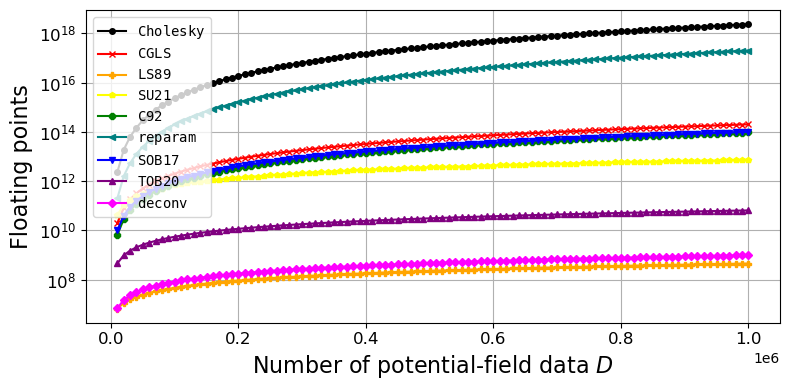

In [7]:
# plot
#mm = 1/25.4  # centimeters in inches
#fig, ax = plt.subplots(figsize=(85*mm, 50*mm))
fig, ax = plt.subplots(figsize=(8,4))

for (method, name, color, marker) in zip(methods, names, colors, markers):
    ax.semilogy(D_list, method, 
                linestyle='-', 
                color=color, marker=marker, alpha=1, markersize=4, label=name)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_xlabel('Number of potential-field data $D$', fontsize=16)
ax.set_ylabel('Floating points', fontsize=16)
ax.grid(True)
ax.legend(loc='best', fontsize=10)
plt.tight_layout()
plt.savefig('../manuscript/Fig/flops.png', dpi= 300)
plt.show()